# 1. DATA CLEANING & PREPARATION

In [2]:
import pandas as pd
import numpy as np
import glob

# Loading ENROLMENT DATA

In [3]:
enrolment_files = glob.glob(
    r"F:\Data.Gov.in Hackthon\Datasets\api_data_aadhar_enrolment\*.csv"
)

enrol_df = pd.concat([pd.read_csv(f) for f in enrolment_files], ignore_index=True)

In [4]:
enrol_df.shape
enrol_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


# Loading DEMOGRAPHIC DATA

In [5]:
demo_files = glob.glob(
    r"F:\Data.Gov.in Hackthon\Datasets\api_data_aadhar_demographic\*.csv"
)

demo_df = pd.concat([pd.read_csv(f) for f in demo_files], ignore_index=True)

In [6]:
demo_df.shape
demo_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


# Loading BIOMETRIC DATA

In [7]:
bio_files = glob.glob(
    r"F:\Data.Gov.in Hackthon\Datasets\api_data_aadhar_biometric\*.csv"
)

bio_df = pd.concat([pd.read_csv(f) for f in bio_files], ignore_index=True)

In [8]:
bio_df .shape
bio_df .head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [9]:
summary = pd.DataFrame({
    "Dataset": ["Enrolment", "Demographic", "Biometric"],
    "Rows": [len(enrol_df), len(demo_df), len(bio_df)],
    "Columns": [enrol_df.shape[1], demo_df.shape[1], bio_df.shape[1]]
})

summary

,Dataset,Rows,Columns
0,Enrolment,1006029,7
1,Demographic,2071700,6
2,Biometric,1861108,6


# Standardize State Names

In [10]:
for df in [enrol_df, demo_df, bio_df]:
    df['state'] = df['state'].astype(str).str.upper().str.strip()

# Date & Time Features

In [11]:
enrol_df['date'] = pd.to_datetime(
    enrol_df['date'],
    dayfirst=True,
    errors='coerce'
)

enrol_df['year'] = enrol_df['date'].dt.year
enrol_df['month'] = enrol_df['date'].dt.month

# Age Group Creation

# Rename columns for clarity

In [12]:
demo_df.rename(columns={
    'demo_age_5_17': 'age_5_17_updates',
    'demo_age_17_': 'age_17_plus_updates'
}, inplace=True)

bio_df.rename(columns={
    'bio_age_5_17': 'age_5_17_updates',
    'bio_age_17_': 'age_17_plus_updates'
}, inplace=True)

# Create AGE CATEGORY LABELS (FOR ANALYSIS)

In [13]:
demo_age_summary = demo_df.groupby('state')[[
    'age_5_17_updates',
    'age_17_plus_updates'
]].sum().reset_index()

bio_age_summary = bio_df.groupby('state')[[
    'age_5_17_updates',
    'age_17_plus_updates'
]].sum().reset_index()

# BIOMETRIC STRESS ANALYSIS

In [14]:
bio_age_summary['total_bio_updates'] = (
    bio_age_summary['age_5_17_updates'] +
    bio_age_summary['age_17_plus_updates']
)

bio_age_summary['adult_share'] = (
    bio_age_summary['age_17_plus_updates'] /
    bio_age_summary['total_bio_updates']
)

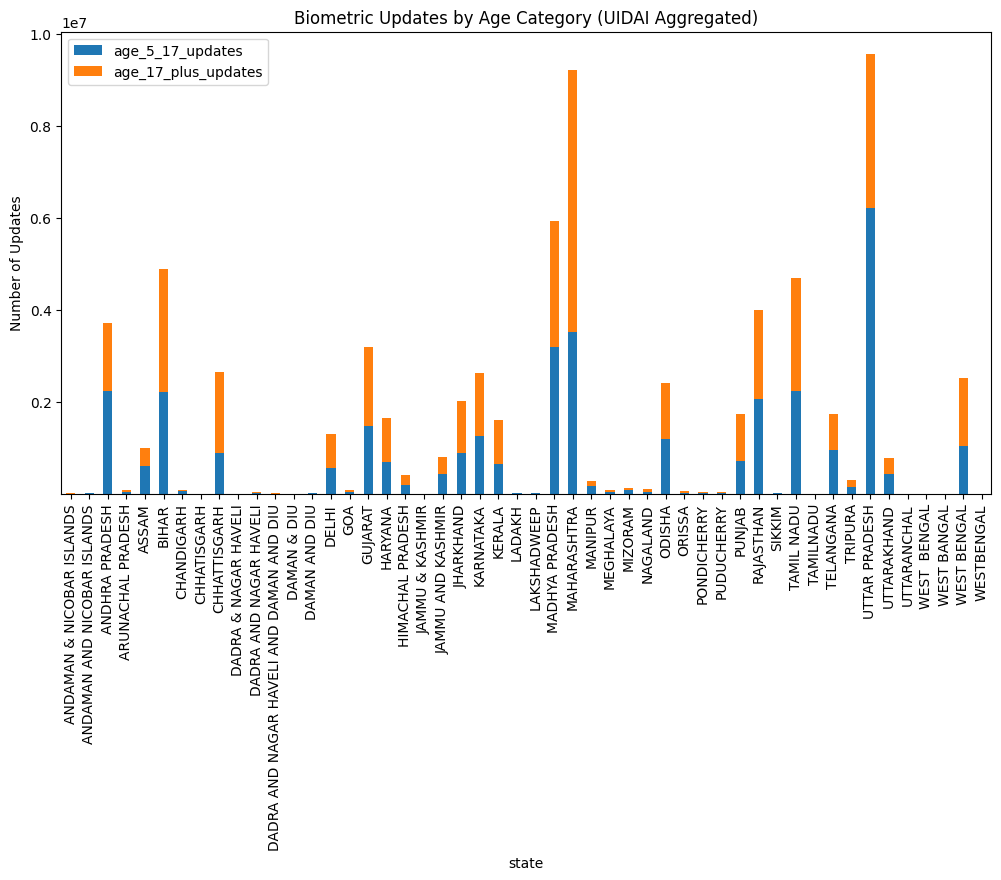

In [15]:
import matplotlib.pyplot as plt
bio_age_summary.set_index('state')[[
    'age_5_17_updates',
    'age_17_plus_updates'
]].plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title("Biometric Updates by Age Category (UIDAI Aggregated)")
plt.ylabel("Number of Updates")
plt.show()

In [17]:
enrol_df.to_csv("F:\\Data.Gov.in Hackthon\\outputs\\enrol_cleaned.csv", index=False)
demo_df.to_csv("F:\\Data.Gov.in Hackthon\\outputs\\demo_cleaned.csv", index=False)
bio_df.to_csv("F:\\Data.Gov.in Hackthon\\outputs\\bio_cleaned.csv", index=False)